In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import pandas as pd

DATASET_PATH = "Dataset/Truth_Seeker_Model_Dataset.csv"
df = pd.read_csv(DATASET_PATH)

print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df = df.sample(frac=1)
df = df[~df['5_label_majority_answer'].isin(['NO MAJORITY'])]

Number of training sentences: 134,198



In [3]:
sentences = df['target'].astype(str) + ' Statement: ' + df['statement'] + ' | Tweet: ' +df['tweet']

In [4]:
sentences[0]

'True Statement: End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic. | Tweet: @POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?'

In [5]:
labels = df["BinaryNumTarget"].values

In [6]:
def generate_truthfulness_4way(row):
    if row['target'] == True:
        if row['5_label_majority_answer'] == 'Agree':
            return "True"
        elif row['5_label_majority_answer'] == 'Disagree':
            return "False"
        elif row['5_label_majority_answer'] == 'Mostly Agree':
            return "Mostly True"
        elif row['5_label_majority_answer'] == 'Mostly Disagree':
            return "Mostly False"
    else:
        if row['5_label_majority_answer'] == 'Agree':
            return "False"
        elif row['5_label_majority_answer'] == 'Disagree':
            return "True"
        elif row['5_label_majority_answer'] == 'Mostly Agree':
            return "Mostly False"
        elif row['5_label_majority_answer'] == 'Mostly Disagree':
            return "Mostly True"

def generate_truthfulness_2way(row):
    if row['target'] == True:
        if row['3_label_majority_answer'] == 'Agree':
            return "True"
        elif row['3_label_majority_answer'] == 'Disagree':
            return "False"
    else:
        if row['3_label_majority_answer'] == 'Agree':
            return "False"
        elif row['3_label_majority_answer'] == 'Disagree':
            return "True"
        

In [7]:
df2 = pd.DataFrame()
df2['4-way-label'] = df.apply(lambda x: generate_truthfulness_4way(x), axis=1)
df2['2-way-label'] = df.apply(lambda x: generate_truthfulness_2way(x), axis=1)

In [8]:
df2

,4-way-label,2-way-label
13409,True,True
22611,True,True
60665,True,True
26137,True,True
101411,False,False
...,...,...
28901,True,True
33151,Mostly True,True
17833,Mostly True,True
22158,True,True


In [11]:
df2['2-way-label'] = df2['2-way-label'].replace({'True': 0, 'False': 1})
df2['4-way-label'] = df2['4-way-label'].replace({'True': 0, 'False': 1, 'Mostly True': .333, 'Mostly False': .666})

In [12]:
df2

,4-way-label,2-way-label
13409,0.000,0
22611,0.000,0
60665,0.000,0
26137,0.000,0
101411,1.000,1
...,...,...
28901,0.000,0
33151,0.666,0
17833,0.666,0
22158,0.000,0


        4-way-label  2-way-label
13409         0.000            0
22611         0.000            0
60665         0.000            0
26137         0.000            0
101411        1.000            1
...             ...          ...
28901         0.000            0
33151         0.666            0
17833         0.666            0
22158         0.000            0
5338          0.000            0

[111593 rows x 2 columns]
        4-way-label  2-way-label
13409         0.000            0
22611         0.000            0
60665         0.000            0
26137         0.000            0
101411        1.000            1
...             ...          ...
28901         0.000            0
33151         0.666            0
17833         0.666            0
22158         0.000            0
5338          0.000            0

[111593 rows x 2 columns]


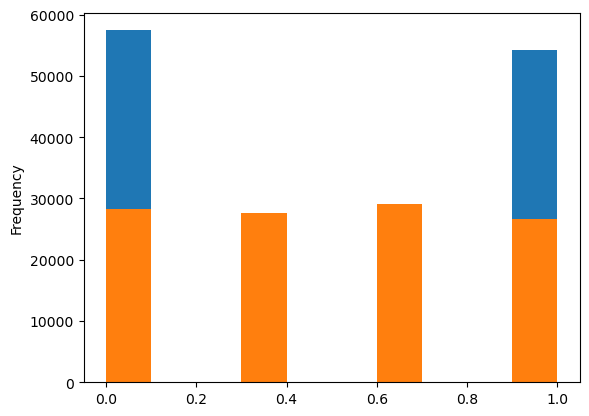

In [13]:
df2['2-way-label'].plot(kind='hist')
print(df2)
df2['4-way-label'].plot(kind='hist')
print(df2)

In [15]:
# labels = df2['2-way-label'].values
labels = df2['2-way-label'].values
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
from transformers import BertTokenizer, DistilBertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Load the Distil BERT tokenizer.
print('Loading Distil BERT tokenizer...')
d_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

C:\Users\abate\anaconda3\envs\truthseeker_gpu\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading BERT tokenizer...
Loading Distil BERT tokenizer...


In [17]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))


# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', d_tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', d_tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  True Statement: End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic. | Tweet: @POTUS Biden Blunders - 6 Month Update

Inflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?
Tokenized:  ['true', 'statement', ':', 'end', 'of', 'ev', '##iction', 'mora', '##torium', 'means', 'millions', 'of', 'americans', 'could', 'lose', 'their', 'housing', 'in', 'the', 'middle', 'of', 'a', 'pan', '##de', '##mic', '.', '|', 't', '##wee', '##t', ':', '@', 'pot', '##us', 'bid', '##en', 'blu', '##nder', '##s', '-', '6', 'month', 'update', 'inflation', ',', 'delta', 'mis', '##mana', '##gement', ',', 'co', '##vid', 'for', 'kids', ',', 'abandoning', 'americans', 'in', 'afghanistan', ',', 'arm', '##ing', 'the', 'taliban', ',', 's', '.', 'border', 'crisis',

In [18]:
max_len = 0
d_max_len = 0
from tqdm import tqdm

# For every sentence...
for sent in tqdm(sentences):

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    d_input_ids = d_tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))
    d_max_len = max(d_max_len, len(d_input_ids))

print('Max sentence length: ', max_len)
print('Max sentence length: ', d_max_len)

  2%|▏         | 2722/111593 [00:04<03:05, 586.09it/s]


KeyboardInterrupt: 

In [19]:
import torch
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
MAX_SENTENCE_LENGTH = 410
d_input_ids = []
d_attention_masks = []

# For every sentence...
for sent in tqdm(sentences):
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_SENTENCE_LENGTH,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

    # also for distil
    d_encoded_dict = d_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_SENTENCE_LENGTH,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
      
    d_input_ids.append(d_encoded_dict['input_ids'])
    d_attention_masks.append(d_encoded_dict['attention_mask'])

  0%|          | 0/111593 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\abate\anaconda3\envs\truthseeker_gpu\Lib\site-packages\transformers\tokenization_utils_base.py:2829: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly act

In [20]:
import torch
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

d_input_ids = torch.cat(d_input_ids, dim=0)
d_attention_masks = torch.cat(d_attention_masks, dim=0)
d_labels = torch.tensor(labels)

C:\Users\abate\AppData\Local\Temp\ipykernel_2260\3016847114.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  d_labels = torch.tensor(labels)


In [21]:

index = 10
# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[index])
print('Token IDs:', input_ids[index])
print ('Labels:', labels[index])

Original:  True Statement: End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic. | Tweet: BREAKING NEWS: Mitch McConnell accuses President Biden of pushing socialism by implementing the eviction moratorium that will stop millions of Americans from being thrown out on the street this month. RT if you think that Mitch is a heartless idiot!
Token IDs: tensor([  101,  2995,  4861,  1024,  1000,  2062,  2304, 10834,  2024, 11113,
        15613,  1999, 16392,  2084,  2141,  1012,  1000,  1064,  1056, 28394,
         2102,  1024,  1030,  3387,  9737, 11589,  2239,  2017,  1005,  1040,
         2036,  2228,  1037,  2304,  9220,  2052,  2022,  2062,  4986,  2008,
         2062,  2304, 10834,  2024, 11113, 15613,  1999, 16392,  2084,  2304,
        10834,  2141,  1012,  2021,  1045,  3984,  2017,  2123,  1005,  1056,
         2031,  2051,  2000,  2470,  2216,  2477,  2043,  2115,  2154,  2003,
        10202,  6224, 10474, 18856,  5833,  2013

In [22]:
print(input_ids.shape)

torch.Size([111593, 410])


In [23]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

d_dataset = TensorDataset(d_input_ids, d_attention_masks, d_labels)

# Create a 80-20 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size


# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
d_train_dataset, d_val_dataset = random_split(d_dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

89,274 training samples
22,319 validation samples


In [24]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 2

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = RandomSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.,
        )


# repeat for distil
d_train_dataloader = DataLoader(
            d_train_dataset,  # The training samples.
            sampler = RandomSampler(d_train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

d_validation_dataloader = DataLoader(
            d_val_dataset, # The validation samples.
            sampler = RandomSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.,
        )

In [26]:
from transformers import DistilBertForSequenceClassification, BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)


d_model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()
d_model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [27]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [29]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

d_optimizer = AdamW(d_model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [30]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs
d_total_steps = len(d_train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

d_scheduler = get_linear_schedule_with_warmup(d_optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = d_total_steps)

In [31]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [32]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [33]:
import torch

# If there's a GPU available...
print(torch.cuda.is_available())
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

True
There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3080


In [34]:
SAVE_DIR = 'Dataset/checkpoints/checkpoint_with_maxlength_410'

In [35]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
# model.to(device)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

for x in range(1): # this will only run once and will run with distilBert instead of Bert
    x = 1

# for x in range(2): # commented out to skip first training as it takes 4 hours
    
    if x == 1:
        model = d_model
        train_dataloader = d_train_dataloader
        validation_dataloader = d_validation_dataloader
        optimizer = d_optimizer
        
    # Measure the total training time for the whole run.
    total_t0 = time.time()
    
    # For each epoch...
    for epoch_i in range(0, epochs):
        
        # ========================================
        #               Training
        # ========================================
        
        # Perform one full pass over the training set.
    
        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('Training...')
    
        # Measure how long the training epoch takes.
        t0 = time.time()
    
        # Reset the total loss for this epoch.
        total_train_loss = 0
    
        # Put the model into training mode. Don't be mislead--the call to 
        # `train` just changes the *mode*, it doesn't *perform* the training.
        # `dropout` and `batchnorm` layers behave differently during training
        # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
        model.train()
        train_loss = 0
        total_fake_examples = 0
        total_true_examples = 0
        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            # if step > 2000:
            #     break
            # Progress update every 40 batches.
            if step % 40 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)
                
                # Report progress.
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}. Training loss. {:} Num fake examples {:} Num true examples {:}'.format(step, len(train_dataloader), elapsed, train_loss,total_fake_examples, total_true_examples ))
    
            # Unpack this training batch from our dataloader. 
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using the 
            # `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids 
            #   [1]: attention masks
            #   [2]: labels 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(torch.int64).to(device)
            total_fake_examples += (b_labels == 1).sum().item()
            total_true_examples += (b_labels == 0).sum().item()
            #print (f"{b_labels.shape=}")
            b_labels_one_hot = torch.nn.functional.one_hot(b_labels, num_classes=2).float()
            #print (b_input_ids.shape, b_labels.shape, b_input_mask.shape, b_labels_one_hot.shape, b_labels_one_hot.dtype)
    
            # Always clear any previously calculated gradients before performing a
            # backward pass. PyTorch doesn't do this automatically because 
            # accumulating the gradients is "convenient while training RNNs". 
            # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
            model.zero_grad()        
    
            # Perform a forward pass (evaluate the model on this training batch).
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # It returns different numbers of parameters depending on what arguments
            # arge given and what flags are set. For our useage here, it returns
            # the loss (because we provided labels) and the "logits"--the model
            # outputs prior to activation.
            output = model(b_input_ids, 
                                 # token_type_ids=None, 
                                 attention_mask=b_input_mask, 
                                 labels=b_labels_one_hot)
            loss = output.loss
            logits = output.logits
    
            # Accumulate the training loss over all of the batches so that we can
            # calculate the average loss at the end. `loss` is a Tensor containing a
            # single value; the `.item()` function just returns the Python value 
            # from the tensor.
            train_loss= loss.item()
            total_train_loss += train_loss
    
            # Perform a backward pass to calculate the gradients.
            loss.backward()
    
            # Clip the norm of the gradients to 1.0.
            # This is to help prevent the "exploding gradients" problem.
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    
            # Update parameters and take a step using the computed gradient.
            # The optimizer dictates the "update rule"--how the parameters are
            # modified based on their gradients, the learning rate, etc.
            optimizer.step()
    
            # Update the learning rate.
            scheduler.step()
            #print (f"Training loss", loss.item())
    
        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)            
        
        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)
    
        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epcoh took: {:}".format(training_time))
            
        # ========================================
        #               Validation
        # ========================================
        # After the completion of each training epoch, measure our performance on
        # our validation set.
    
        print("")
        print("Running Validation...")
    
        t0 = time.time()
    
        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()
    
        # Tracking variables 
        total_eval_accuracy = 0
        total_eval_loss = 0
        nb_eval_steps = 0
    
        # Evaluate data for one epoch
        
        for step, batch in enumerate(validation_dataloader):
            # if step > 2000:
            #     break
            # Unpack this training batch from our dataloader. 
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using 
            # the `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids 
            #   [1]: attention masks
            #   [2]: labels 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(torch.int64).to(device)
            b_labels_one_hot = torch.nn.functional.one_hot(b_labels, num_classes=2).float()
            
            # Tell pytorch not to bother with constructing the compute graph during
            # the forward pass, since this is only needed for backprop (training).
            with torch.no_grad():        
    
                # Forward pass, calculate logit predictions.
                # token_type_ids is the same as the "segment ids", which 
                # differentiates sentence 1 and 2 in 2-sentence tasks.
                # The documentation for this `model` function is here: 
                # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                # Get the "logits" output by the model. The "logits" are the output
                # values prior to applying an activation function like the softmax.
                
                output = model(b_input_ids, 
                                       # token_type_ids=None, 
                                       attention_mask=b_input_mask,
                                       labels=b_labels_one_hot)
                loss = output.loss
                logits = output.logits
    
    
                
            # Accumulate the validation loss.
            total_eval_loss += loss.item()
    
            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()
    
            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            total_eval_accuracy += flat_accuracy(logits, label_ids)
            
    
        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    
        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)
        
        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)
        
        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))
    
        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur.': avg_val_accuracy,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )
        #Save model checkpoint
        model.save_pretrained(SAVE_DIR)
    
    print("")
    print("Training complete!")
    
    print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...


C:\Users\abate\anaconda3\envs\truthseeker_gpu\Lib\site-packages\torch\optim\lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


  Batch    40  of  44,637.    Elapsed: 0:00:02. Training loss. 0.6684021353721619 Num fake examples 43 Num true examples 37
  Batch    80  of  44,637.    Elapsed: 0:00:03. Training loss. 0.13772344589233398 Num fake examples 77 Num true examples 83
  Batch   120  of  44,637.    Elapsed: 0:00:05. Training loss. 1.2736718654632568 Num fake examples 114 Num true examples 126
  Batch   160  of  44,637.    Elapsed: 0:00:06. Training loss. 0.03370995447039604 Num fake examples 148 Num true examples 172
  Batch   200  of  44,637.    Elapsed: 0:00:08. Training loss. 0.016007795929908752 Num fake examples 187 Num true examples 213
  Batch   240  of  44,637.    Elapsed: 0:00:09. Training loss. 0.015445040538907051 Num fake examples 230 Num true examples 250
  Batch   280  of  44,637.    Elapsed: 0:00:10. Training loss. 0.009891578927636147 Num fake examples 267 Num true examples 293
  Batch   320  of  44,637.    Elapsed: 0:00:12. Training loss. 0.009709976613521576 Num fake examples 312 Num true

   epoch  Training Loss  Valid. Loss  Valid. Accur. Training Time  \
0      1       0.183926     0.181807       0.970161       0:26:56   
1      2       0.183948     0.183410       0.970161       0:27:58   
2      3       0.184093     0.191016       0.970161       0:29:15   
3      4       0.184358     0.195673       0.970161       0:27:34   

  Validation Time  
0         0:01:40  
1         0:01:44  
2         0:01:47  
3         0:01:40  


,epoch,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
0,1,0.183926,0.181807,0.970161,0:26:56,0:01:40
1,2,0.183948,0.183410,0.970161,0:27:58,0:01:44
2,3,0.184093,0.191016,0.970161,0:29:15,0:01:47
3,4,0.184358,0.195673,0.970161,0:27:34,0:01:40


['0:26:56', '0:27:58', '0:29:15', '0:27:34']
[datetime.datetime(1900, 1, 1, 0, 26, 56), datetime.datetime(1900, 1, 1, 0, 27, 58), datetime.datetime(1900, 1, 1, 0, 29, 15), datetime.datetime(1900, 1, 1, 0, 27, 34)]


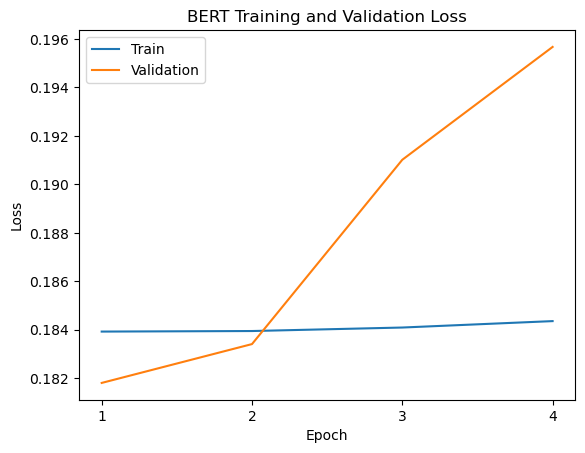

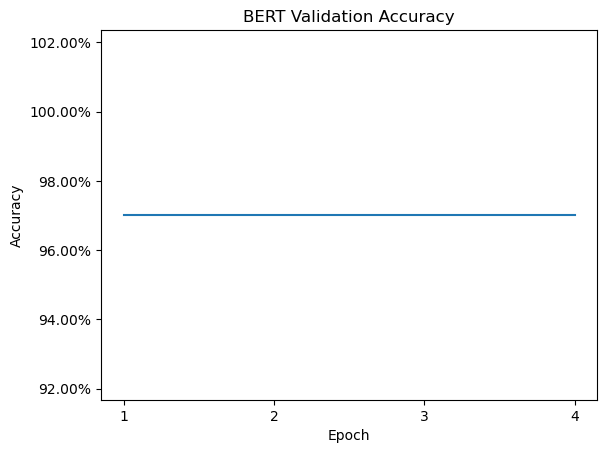

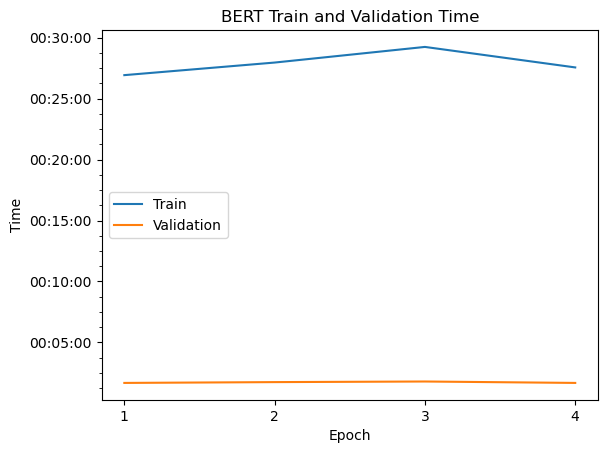

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
# import dataframe_image as dfi

ts_df = pd.DataFrame(training_stats)
print(ts_df)
styled_df = ts_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]}
])
display(styled_df)
# dfi.export(styled_df, 'styled_df.png') 

ep = [d['epoch'] for d in training_stats]

tl = [d['Training Loss'] for d in training_stats]
vl = [d['Valid. Loss'] for d in training_stats]
va = [d['Valid. Accur.'] for d in training_stats]

tt = [d['Training Time'] for d in training_stats]
print(tt)
tt = [datetime.strptime(item,'%H:%M:%S') for item in tt]
print(tt)
vt = [d['Validation Time'] for d in training_stats]
vt = [datetime.strptime(item,'%H:%M:%S') for item in vt]


plt.plot(ep, tl)
plt.plot(ep, vl)
plt.xticks(ep)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BERT Training and Validation Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('DistilBERTLoss_3.png')
plt.show()


fig,ax = plt.subplots()
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0, decimals=2))
ax.plot(ep, va)
plt.xticks(ep)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('BERT Validation Accuracy')
plt.savefig('DistilBERTAcc_3.png')
plt.show()



fig,ax = plt.subplots()
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S',))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.plot(ep, tt)
ax.plot(ep, vt)
plt.xticks(ep)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('BERT Train and Validation Time')
plt.legend(['Train', 'Validation'], loc='center left')
plt.savefig('DistilBERTTime_3.png')
plt.show()


# plt.legend(['Train', 'Validation'], loc='upper left')


## Inference

In [34]:
def encode(sentence):
    return tokenizer.encode_plus(
                        sentence,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 410,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

SENTENCE_INDEX = 5000
encoded_dict = encode(sentences[SENTENCE_INDEX])
input_id = encoded_dict['input_ids']
attention_mask = encoded_dict['attention_mask']
print (input_id.shape)
model.eval()
output = model(
            input_id.cuda(),
            token_type_ids=None, 
            attention_mask=attention_mask.cuda(), return_dict=True)
print (output)
print (labels[SENTENCE_INDEX])

C:\Users\abate\anaconda3\envs\test_env_gpu\lib\site-packages\transformers\tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


torch.Size([1, 410])
SequenceClassifierOutput(loss=None, logits=tensor([[ 5.3244, -5.3105]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor(1)


## Using validation dataset

In [35]:
val_dataset[0][1]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:

SENTENCE_INDEX = 5000
model.eval()
print (torch.unsqueeze(val_dataset[SENTENCE_INDEX][0].cuda(), dim=0).shape)
output = model(torch.unsqueeze(val_dataset[SENTENCE_INDEX][0].cuda(), dim=0),
            token_type_ids=None, 
            attention_mask=torch.unsqueeze(val_dataset[SENTENCE_INDEX][0].cuda(),dim=0), return_dict=True)
print (output)
print (labels[SENTENCE_INDEX])

torch.Size([1, 410])
SequenceClassifierOutput(loss=None, logits=tensor([[nan, nan]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor(1)


In [37]:
for step, batch in enumerate(validation_dataloader):
    if step > 5:
        break
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(torch.int64).to(device)
    b_labels_one_hot = torch.nn.functional.one_hot(b_labels, num_classes=2).float()
    
    # Tell pytorch not to bother with constructing the compute graph during
    # the forward pass, since this is only needed for backprop (training).
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        
        output = model(b_input_ids, 
                               token_type_ids=None, 
                               attention_mask=b_input_mask,
                               labels=b_labels_one_hot)
        loss = output.loss
        logits = output.logits
        print (logits, b_labels)

tensor([[ 5.3243, -5.3206],
        [-5.2057,  5.1967]], device='cuda:0') tensor([0, 1], device='cuda:0')
tensor([[ 5.3234, -5.3117],
        [ 5.3278, -5.3160]], device='cuda:0') tensor([0, 0], device='cuda:0')
tensor([[ 5.3254, -5.3102],
        [ 5.3244, -5.3161]], device='cuda:0') tensor([0, 0], device='cuda:0')
tensor([[-5.1353,  5.1972],
        [ 5.3283, -5.3043]], device='cuda:0') tensor([1, 0], device='cuda:0')
tensor([[ 5.3247, -5.3024],
        [-5.2182,  5.2226]], device='cuda:0') tensor([0, 1], device='cuda:0')
tensor([[-5.2218,  5.2306],
        [ 5.3256, -5.3067]], device='cuda:0') tensor([1, 0], device='cuda:0')
